# **Image Processing** **-**  *****American Sign Language (ASL)*****

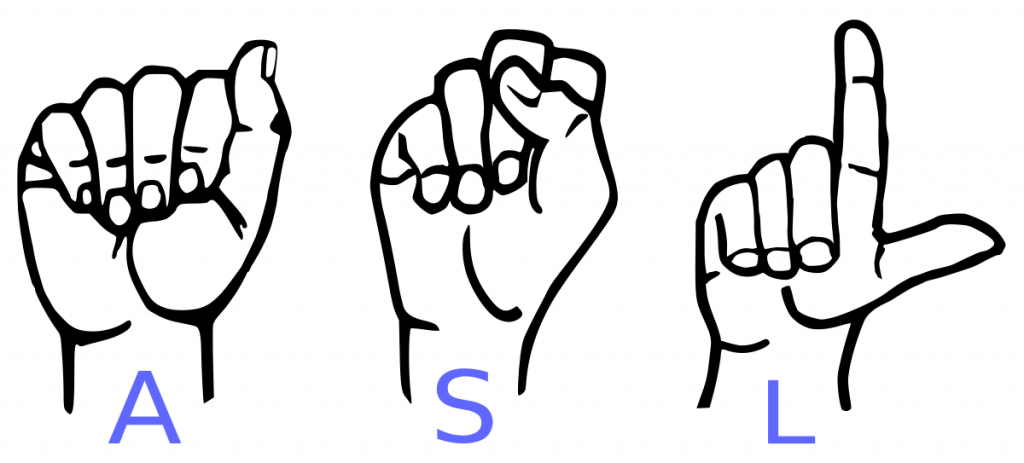






```

```

## **Group Members :**
---
| **Name**        |    **Roll No**   | 
| :---            |    :----:        |
| R.Abhinav       | CB.EN.U4CSE19453 |
| P.Kalaiarasan   | CB.EN.U4CSE19446 |
| P.Koushik       | CB.EN.U4CSE19449 |
| S.Shanthan      | CB.EN.U4CSE19459 |

---

## **Mounting and Importing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**All the import statements for the libraries used in the project below lies here.**



In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

## **Exploring the Data**

In [3]:
#reading the dataset 

test_df = pd.read_csv("/content/drive/MyDrive/Sign Language/datasets/sign_mnist_test.csv")
train_df = pd.read_csv("/content/drive/MyDrive/Sign Language/datasets/sign_mnist_train.csv")


In [4]:
print(type(test_df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [6]:
test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7167,1,135,119,108,102,105,99,61,103,121,133,143,148,156,160,162,164,168,171,173,175,178,179,181,182,184,185,185,186,137,116,111,101,110,92,66,108,124,132,155,...,147,132,115,112,117,118,112,153,189,178,173,166,140,121,157,125,93,99,100,101,104,100,118,167,154,141,136,139,135,125,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,176,176,176,178,176,176,178,177,176,178,178,177,176,176,176,174,174,173,173,159,163,164,166,168,169,173,175,177,178,177,...,90,78,191,215,212,214,212,209,209,208,208,207,189,192,196,199,191,208,230,201,197,185,184,187,169,136,131,107,69,127,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,192,193,192,191,192,191,191,192,189,189,189,188,188,188,187,186,185,184,183,193,193,193,193,193,193,194,194,193,195,195,...,215,215,215,214,213,213,212,212,210,209,208,207,215,215,207,207,208,207,203,196,170,99,92,92,89,155,213,216,216,216,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,229,234,233,233,237,237,237,240,241,238,240,240,242,243,241,239,239,239,239,206,209,212,215,218,220,223,226,227,229,236,...,168,173,128,127,255,255,255,255,159,99,80,77,255,255,255,255,255,255,231,255,255,255,255,255,249,231,188,164,169,176,112,169,255,255,237,113,91,67,70,63
7171,2,173,174,173,174,173,173,175,175,174,175,176,175,174,174,173,173,174,170,172,172,170,171,171,170,168,168,167,166,176,176,176,176,176,176,177,177,176,178,178,...,198,200,199,199,197,197,197,196,194,193,192,191,199,201,190,190,194,192,187,181,154,72,66,74,54,139,210,198,201,201,201,200,197,198,198,197,195,195,193,192


In [7]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB
None


In [8]:
train_df.rename(columns={'label':'Label'},inplace = True)
test_df.rename(columns={'label':'Label'},inplace = True)

# Shuffle
train_df = train_df.sample(frac = 1.0).reset_index(drop = True)
test_df = test_df.sample(frac = 1.0).reset_index(drop = True)

In [9]:
# Showing the first 4 lines of the training set

train_df.iloc[:4,:10]

,Label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9
0,5,64,71,77,86,93,100,106,111,112
1,20,128,128,129,129,129,129,129,129,129
2,22,98,107,116,125,130,133,139,144,147
3,24,176,180,184,186,188,191,195,197,201


In [10]:
print(f'Number of images in the training set: {train_df.shape[0]}')
print(f'Number of images in the test set: {test_df.shape[0]}')

d = int((train_df.shape[1] - 1)**0.5)
print(f'Shape of the images: {d} x {d}')

Number of images in the training set: 27455
Number of images in the test set: 7172
Shape of the images: 28 x 28


In [11]:
print(train_df.dtypes)
print("_______________\n")
print(train_df.dtypes.value_counts())

Label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object
_______________

int64    785
dtype: int64


In [12]:
train_df.describe()

,Label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,165.533673,166.685522,167.811983,168.495647,169.310872,169.956948,170.460463,170.716518,170.872701,170.808887,170.481442,169.979749,169.264506,168.144127,166.936660,165.765944,163.620725,161.933600,161.349117,147.146858,150.284502,152.941978,155.415043,158.068986,160.229576,162.345802,164.291167,165.736332,166.991732,168.503187,...,131.949918,134.583755,139.361974,148.115862,155.095465,160.346858,163.915607,165.364414,165.911273,165.182080,164.407977,163.488254,143.407758,144.189474,145.711637,147.660718,149.019414,148.670843,148.185212,147.298926,146.286323,144.027062,142.966017,139.769550,137.071572,135.277181,131.922783,130.232235,132.046367,135.289237,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,31.279244,30.558445,29.771007,29.329251,28.620248,27.961255,27.053544,26.763535,26.307419,26.088459,26.475963,26.940885,27.871515,29.368386,30.906718,31.902723,34.303747,35.991306,36.571064,41.555429,40.094304,39.427215,38.686176,37.242459,36.373576,35.242915,33.899171,32.759395,31.656140,30.833853,...,57.586028,60.373218,63.301768,63.300608,63.511566,62.551522,61.833119,62.210750,62.163516,61.958245,61.950177,62.403709,54.406116,53.658786,54.710497,54.613724,54.351761,55.233710,55.904715,57.155523,57.965677,57.393379,56.689603,56.118823,54.680900,55.278778,56.384076,58.111783,59.204300,62.553694,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,23.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

## **Statistical Analysis of data** 

In [13]:
train_df.mean()

Label        12.318813
pixel1      145.419377
pixel2      148.500273
pixel3      151.247714
pixel4      153.546531
               ...    
pixel780    162.736696
pixel781    162.906137
pixel782    161.966454
pixel783    161.137898
pixel784    159.824731
Length: 785, dtype: float64

In [14]:
#finding the median for the numberical columns in the data set 
train_df.median()

Label        13.0
pixel1      150.0
pixel2      153.0
pixel3      156.0
pixel4      158.0
            ...  
pixel780    184.0
pixel781    184.0
pixel782    182.0
pixel783    182.0
pixel784    182.0
Length: 785, dtype: float64

In [15]:
# finding the mode of the numerical columns in the data set

k = train_df.mode()

k[0:1]

,Label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,17.0,158.0,171.0,172.0,171.0,165.0,159.0,157.0,158.0,174.0,164.0,165.0,165.0,166.0,164.0,164.0,164.0,165.0,165.0,164.0,167.0,166.0,159.0,158.0,167.0,167.0,167.0,167.0,165.0,172.0,173.0,160.0,176.0,180.0,179.0,179.0,179.0,166.0,171.0,165.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,255.0,0.0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [16]:
# finding the standard deviation the dataset for the numerical values 
standard_deviation = train_df.std()
print(standard_deviation)

Label        7.287552
pixel1      41.358555
pixel2      39.942152
pixel3      39.056286
pixel4      38.595247
              ...    
pixel780    63.444008
pixel781    63.509210
pixel782    63.298721
pixel783    63.610415
pixel784    64.396846
Length: 785, dtype: float64


In [17]:
# finding the variance for the numerical values of the dataset
variance = standard_deviation**2
print(variance)

Label         53.108415
pixel1      1710.530097
pixel2      1595.375528
pixel3      1525.393469
pixel4      1489.593076
               ...     
pixel780    4025.142186
pixel781    4033.419724
pixel782    4006.728058
pixel783    4046.284910
pixel784    4146.953763
Length: 785, dtype: float64


## **Data preprocessing**
* converting array to images(tensors)

* visulaizing lables and making sure that dataset is balanced

* performing encoding for lables

In [18]:
# couting the missing values or cells with empty values 

no_of_missing_values = train_df.isnull().sum()
total_missing_values = no_of_missing_values.sum()
print(no_of_missing_values)

print("\n\nTotal missing values in the dataset: {0}".format(total_missing_values))

Label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


Total missing values in the dataset: 0


In [19]:
# checking if there are any duplicated values 

print("Duplicated Columns :",train_df.duplicated().sum())

Duplicated Columns : 0


In [20]:
# Create training and testing arrays
train_set = np.array(train_df, dtype = 'float32')
test_set = np.array(test_df, dtype='float32')

**Reason:**
- The training and testing input arrays are converted to continuous float values since it allows our model for a more precise learning as compared to discrete values

In [21]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Text(0.5, 1.0, 'E')

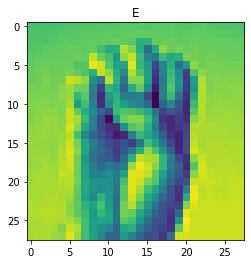

In [22]:
#See a random image for class label verification
import random
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28)))
label_index = train_df["Label"][i]
plt.title(f"{class_names[label_index]}")

**Inference:**
- We also need to reshape the array to (28x28) since the initial shape is just a row array.

## **Subplots :** 

- `Define the dimensions of the plot grid`
- `flaten the 15 x 15 matrix into 225 array`
- `get the length of the train dataset`
- `Select a random number from 0 to n_train`
- `create evenly spaces variables`
- `Select a random number`
- `read and display an image with the selected index`

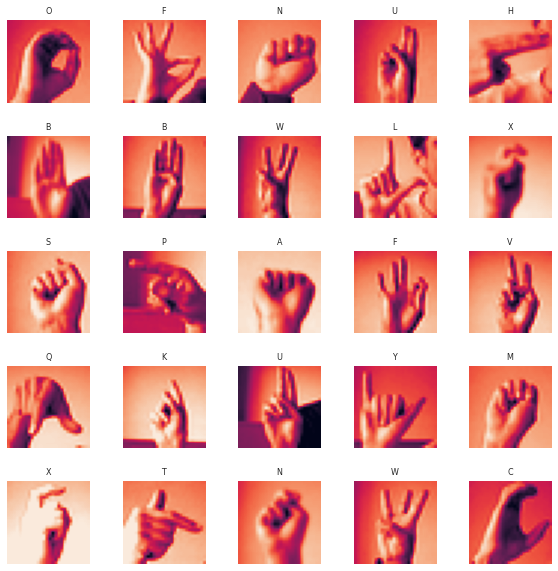

In [53]:
#  
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel()  
n_train = len(train_set)
for i in np.arange(0, W_grid * L_grid): 
    index = np.random.randint(0, n_train)     
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [24]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

- we know that the pixel values lies between 0-255 but it is observed that models performs exceptionally well if we scale pixel values between 0-1

In [25]:
y_train

array([ 5., 20., 22., ..., 17., 23., 22.], dtype=float32)

In [26]:
X_train

array([[0.2509804 , 0.2784314 , 0.3019608 , ..., 0.7607843 , 0.7607843 ,
        0.7647059 ],
       [0.5019608 , 0.5019608 , 0.5058824 , ..., 0.01960784, 0.01176471,
        0.04705882],
       [0.38431373, 0.41960785, 0.45490196, ..., 0.8117647 , 0.8039216 ,
        0.8       ],
       ...,
       [0.6313726 , 0.63529414, 0.6392157 , ..., 0.18039216, 0.14509805,
        0.14117648],
       [0.6039216 , 0.62352943, 0.64705884, ..., 0.8352941 , 0.8352941 ,
        0.83137256],
       [0.47058824, 0.49411765, 0.52156866, ..., 0.7647059 , 0.7647059 ,
        0.75686276]], dtype=float32)

## **Visualization**

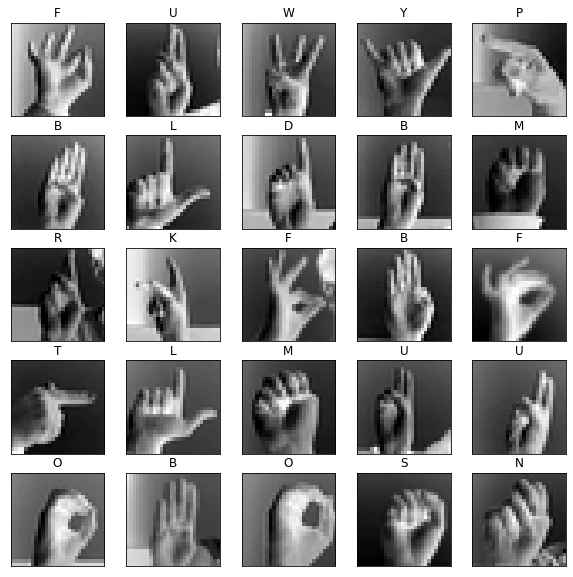

In [27]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [28]:
#Get our training labels:
labels = train_df['Label'].values

In [29]:
label_frq=pd.value_counts(train_df['Label'],ascending=True).reset_index(level=0)
pd.DataFrame(label_frq)

,index,Label
0,4,957
1,1,1010
2,7,1013
3,12,1055
4,21,1082
5,15,1088
6,6,1090
7,10,1114
8,24,1118
9,0,1126


In [30]:
unique_labels = train_df['Label'].unique()
unique_labels = np.sort(unique_labels)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

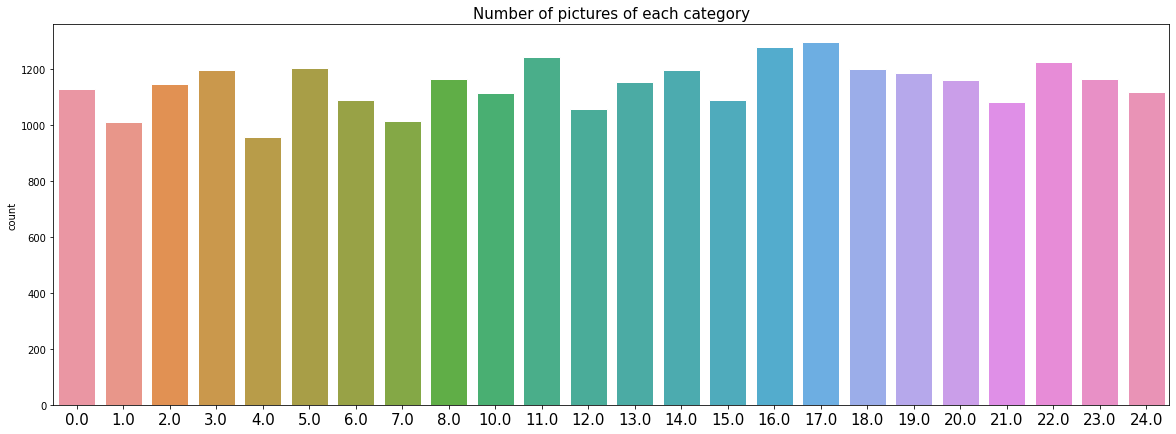

In [31]:
# visulaizing the data

plt.figure(figsize=(20,7))
plt.title("Number of pictures of each category", fontsize = 15)
plt.xticks(fontsize = 15)
sns.set_style("darkgrid");
sns.countplot(y_train);

**Observation:**
- We can see the visual tells us that there are nearly 1000 examples for each class output 
- So we can consider this dataset as a balanecd dataset because there's no class suffering from very less or too much examples


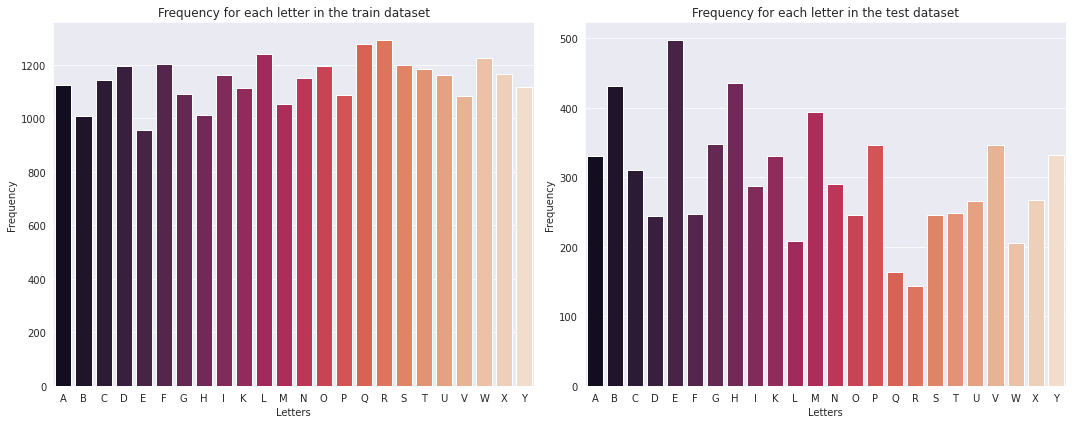

In [32]:
list_data = [train_df, test_df]
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

for data, ax, names in zip(list_data, axes.ravel(), ['train', 'test']):
    sns.countplot(data['Label'], palette='rocket', ax=ax)
    ax.set_title("Frequency for each letter in the {} dataset".format(names))
    ax.set_xlabel('Letters')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                            'T','U','V','W','X','Y'])

plt.tight_layout()

In [33]:
#Encoding:

from sklearn.preprocessing import LabelBinarizer
labels = train_df['Label'].values
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

**Observation:**
- So basically LabelBinarizer performed `One-Hot Encoding`  on our training data.


In [34]:
labels[27454]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

##**Feature Engineering**

In [35]:
train_df_original = train_df.copy()

In [36]:
# Split into training, test and validation sets
val_index = int(train_df.shape[0]*0.1)

train_df = train_df_original.iloc[val_index:]
val_df = train_df_original.iloc[:val_index]

In [37]:
Y_train = train_df['Label']
Y_val = val_df['Label']
Y_test = test_df['Label']

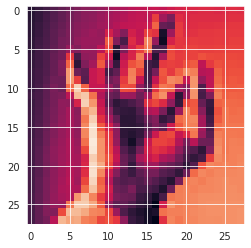

In [38]:
plt.imshow(X_train[0].reshape(28,28))

In [39]:
print("len of X_train is %s" % (len(X_train)))
print("len of X_test is %s" % (len(X_test)))
print("len of y_train is %s" % (len(y_train)))
print("len of y_test is %s" % (len(y_test)))

len of X_train is 27455
len of X_test is 7172
len of y_train is 27455
len of y_test is 7172


## **Logistic Regression:**

In [41]:
model = []                                                                      # Model names
accuracy = []                                                                   # Accuracy of the respective model

## **Decision Tree**

## **Random Forest:**

## **Accuracy Comparison**

## **Prediction:**

## **To visualize the inner working of the model we use Confusion Matrix**

**Observation:**
- In above matrix, X axis contains `predicted values`, and Y axis contains `actual values`. 
- Each value of matrix show the number of times predicted value matched with actual value.

#*****End of the Review🙂*****

# **CONCLUSIONS AND FUTURE WORK**
Hand gesture recognition is a difficult problem and the current
work is only a small step towards achieving the results needed
in the field.

- [x] This notebook presented a comparative study of three
algorithms applied to two different datasets for static gesture
recognition and classification, for human computer interaction.
- [x] Future work will be concerned with the study of different hand
feature selection applied to hand gesture recognition, noise
reduction in the depth images acquired.